<a href="https://colab.research.google.com/github/arpanastanley24/Bank-marketing-campaigns-prediction-/blob/main/Prediction_of_Bank_marketing_campaigns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BANK MARKETING**

* The data is related with direct marketing campaigns of a Portuguese banking institution.

* The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

* The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).


**ATTRIBUTE DESCRIPTION**

**Bank client data:**

   1 - age (numeric)
   
   2 - job : type of job (categorical)

             "admin.",
             "unknown",
             "unemployed",
             "management",
             "housemaid",
             "entrepreneur",
             "student",
             "blue-collar",
             "self-employed",
             "retired",
             "technician",
             "services"

   3 - marital : marital status (categorical)

                 "married",
                 "divorced",
                 "single"
       Note: "divorced" means divorced or widowed

   4 - education :Educational details  (categorical)

                  "unknown",
                  "secondary",
                  "primary",
                  "tertiary"

   5 - default: has credit in default? (binary)
   
                "yes",
                "no"

   6 - balance: average yearly balance, in euros (numeric)

   7 - housing: has housing loan? (binary)

                "yes",
                "no"

   8 - loan: has personal loan? (binary)
   
             "yes",
             "no"

**Related with the last contact of the current campaign:**

   9 - contact: contact communication type (categorical)

               "unknown",
               "telephone",
               "cellular"

  10 - day: last contact day of the month (numeric)


  11 - month: last contact month of year (categorical)

             "jan",
             "feb",
             "mar",
              ...,
             "nov",
             "dec"


  12 - duration: last contact duration, in seconds (numeric)

**Other attributes:**

  13 - campaign: number of contacts performed during this campaign and for this client, includes last contact (numeric)

  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric)
  
        -1 means client was not previously contacted

  15 - previous: number of contacts performed before this campaign and for this client (numeric)

  16 - poutcome: outcome of the previous marketing campaign (categorical)
  
                 "unknown",
                 "other",
                 "failure",
                 "success"

**Output variable (desired target):**

  17 - y - has the client subscribed a term deposit? (binary)

           "yes",
           "no"

### **ACKNOWLEDGMENT**

This dataset is taken from Kaggle.

  **SOURCE:** UCI

  This dataset is public available for research. The details are described in [Moro et al., 2011]. S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology.
  In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.

  Available at: [pdf] http://hdl.handle.net/1822/14838
                [bib] http://www3.dsi.uminho.pt/pcortez/bib/2011-esm-1.txt

In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Supress Warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Importing the Dataset
df = pd.read_csv('/content/drive/MyDrive/bank-full.csv')

# **EXPLORATORY DATA ANALYSIS**

During the overview analysis, we examine the general characteristics and properties of the dataset. This includes:

**Data Shape:** Determining the number of rows and columns in the dataset to understand its size.

**Data Types:** Identifying the data types of variables (e.g., numeric, categorical, datetime) to determine the nature of the data.

**Missing Values:** Investigating the presence of missing values in the dataset and deciding on an appropriate strategy to handle them.

**Summary Statistics:** Computing descriptive statistics (e.g., mean, median, standard deviation) for numeric variables to gain insights into the central tendencies and distributions.

**Categorical Variables:** Analyzing the unique values and frequencies of categorical variables to understand the different categories and their proportions.

**Relationships:** Exploring the correlations and relationships between variables through correlation analysis or visualization techniques.

The overview analysis provides a high-level understanding of the dataset and helps identify potential issues or patterns that may require further investigation.

In [3]:
#Retrieves the first 5 rows
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
#Retrieves the last 7 rows
df.tail(7)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [5]:
#Size of the dataset
print("Size of Dataset: {} rows , {} columns".format(df.shape[0],df.shape[1]))

Size of Dataset: 45211 rows , 17 columns


In [6]:
#Checking for missing values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [7]:
#Checking for duplicate values
df.duplicated().sum()

0

In [8]:
#Datatypes for all the columns
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [10]:
#Count of unique values in each variables
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

In [11]:
#Checking for the unique values in job variable
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [12]:
#Count of each values in the variable 'job'
df.groupby('job').size()

job
admin.           5171
blue-collar      9732
entrepreneur     1487
housemaid        1240
management       9458
retired          2264
self-employed    1579
services         4154
student           938
technician       7597
unemployed       1303
unknown           288
dtype: int64

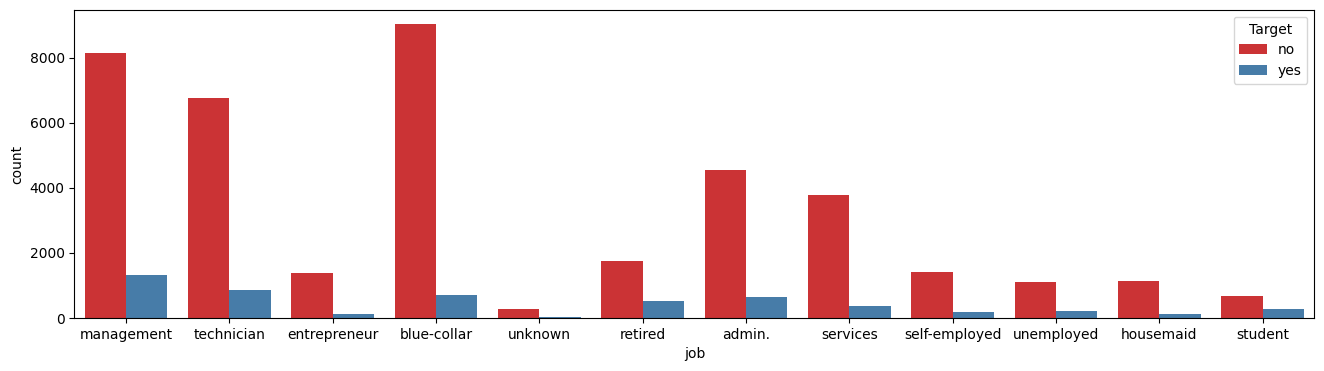

In [13]:
#Plot the count of each values in the variable 'job'
plt.figure(figsize=(16, 4),dpi=100)
sns.countplot(x='job',hue="Target", palette="Set1", data=df)
plt.show()

In [14]:
#Count of each values in the variable 'marital'
df['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

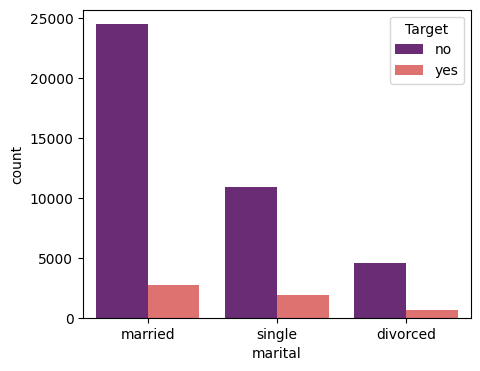

In [15]:
#Plot the count of each values in the variable 'marital'
plt.figure(figsize=(5, 4),dpi=100)
sns.countplot(x='marital',hue="Target", palette="magma", data=df)
plt.show()

In [16]:
#Count of each values in the variable 'education'
df['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

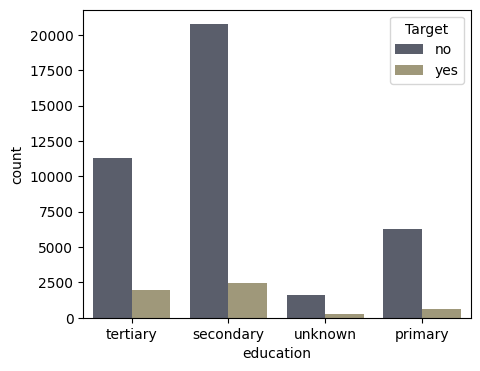

In [17]:
#Plot the count of each values in the variable 'education'
plt.figure(figsize=(5, 4),dpi=100)
sns.countplot(x='education',hue="Target", palette="cividis", data=df)
plt.show()

In [18]:
#Count of each values in the variable 'default'
df['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

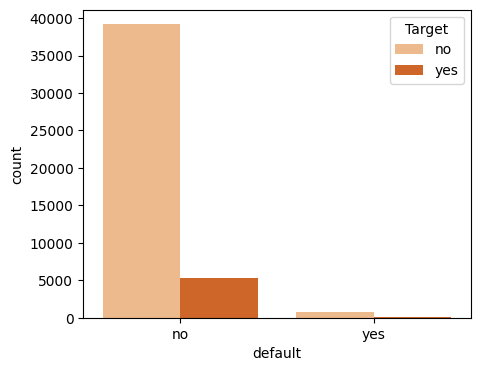

In [19]:
#Plot the count of each values in the variable 'default'
plt.figure(figsize=(5, 4),dpi=100)
sns.countplot(x='default',hue="Target", palette="Oranges", data=df)
plt.show()

In [20]:
#Count of each values in the variable 'housing'
df['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

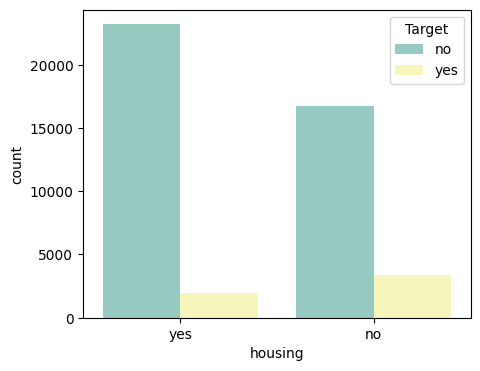

In [21]:
#Plot the count of each values in the variable 'housing'
plt.figure(figsize=(5, 4),dpi=100)
sns.countplot(x='housing',hue="Target", palette="Set3", data=df)
plt.show()

In [22]:
#Count of each values in the variable 'loan'
df['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

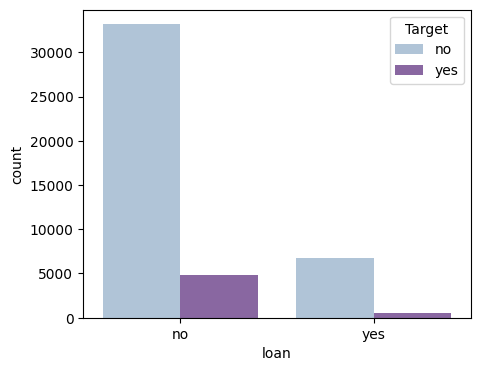

In [23]:
#Plot the count of each values in the variable 'loan'
plt.figure(figsize=(5, 4),dpi=100)
sns.countplot(x='loan',hue="Target", palette="BuPu", data=df)
plt.show()

In [24]:
#Count of each values in the variable 'contact'
df['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

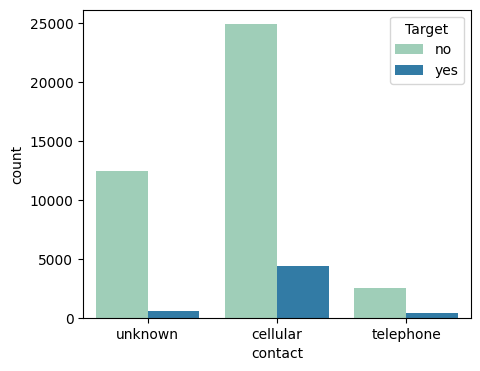

In [25]:
#Plot the count of each values in the variable 'contact'
plt.figure(figsize=(5, 4),dpi=100)
sns.countplot(x='contact',hue="Target", palette="YlGnBu", data=df)
plt.show()

In [26]:
#Count of each values in the variable 'month'
df['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

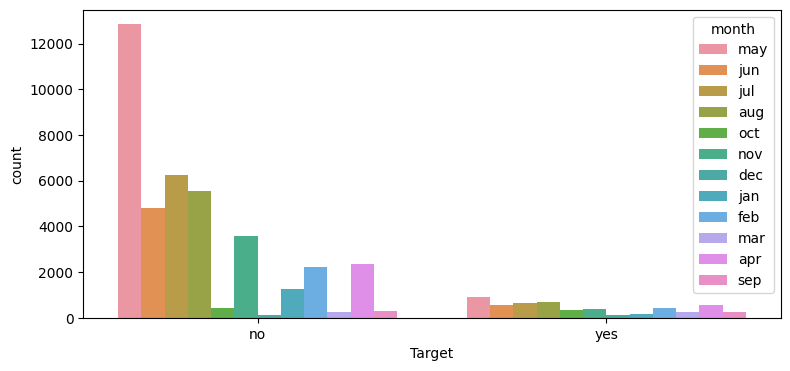

In [27]:
#Plot the count of each values in the variable 'month'
plt.figure(figsize=(9, 4),dpi=100)
sns.countplot(x='Target',hue="month", data=df)
plt.show()

In [28]:
#Count of each values in the variable 'poutcome'
df['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

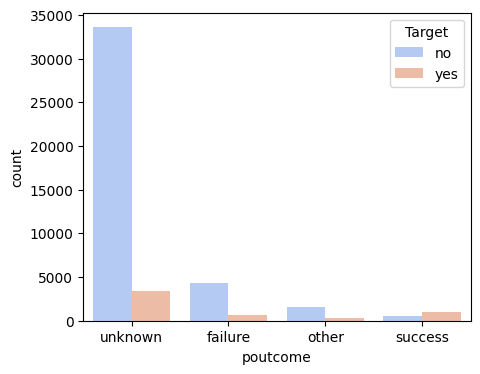

In [29]:
#Plot the count of each values in the variable 'poutcome'
plt.figure(figsize=(5, 4),dpi=100)
sns.countplot(x='poutcome',hue="Target", palette="coolwarm", data=df)
plt.show()

[Text(0.5, 1.0, 'Visualising Age Distribution of Clients')]

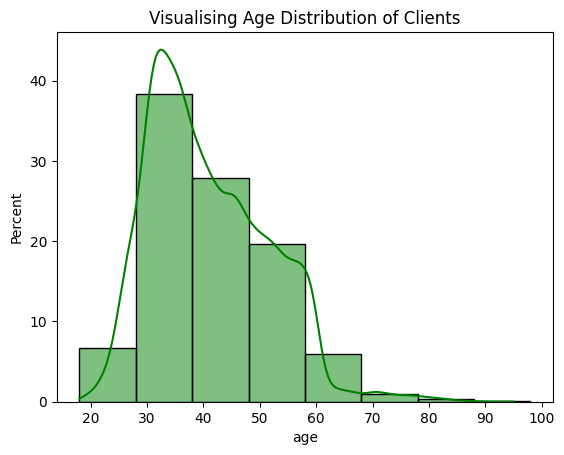

In [30]:
#Plot the percent of each values in the variable 'age'
sns.histplot(data=df, x="age", stat="percent", color = "green", binwidth= 10, kde=True, legend = True).set(title='Visualising Age Distribution of Clients')

[Text(0.5, 1.0, 'Visualising call distribution of Clients')]

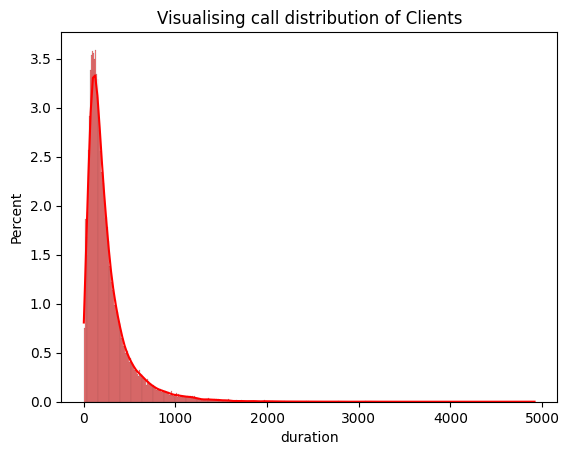

In [31]:
#Plot the percent of each values in the variable 'duration'
sns.histplot(data=df, x="duration", stat="percent", color = "red", binwidth= 10, kde=True, legend = True).set(title='Visualising call distribution of Clients')

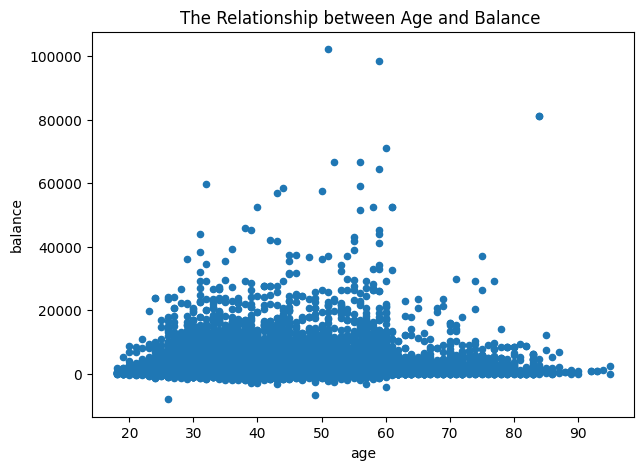

In [32]:
#relationship between age and balance
df.plot.scatter('age','balance',figsize = (7,5))
plt.title('The Relationship between Age and Balance ')
plt.show()

We can see as the age of the customer increases their balance is decreasing and clients tend to have a significantly lower balance, mostly under 50000 euros. This could be possibly because of the retirement age being 60 and after which there is no significant source of income for majority of the people.

### **CORRELATION ANALYSIS**

* Correlation analysis is a statistical technique used to measure the strength and direction of the linear relationship between two or more variables.

* It helps us understand the extent to which changes in one variable are associated with changes in another variable.

* In correlation analysis, the correlation coefficient is calculated, which quantifies the degree of association between variables.

**Correlation Matrix:**

* A correlation matrix is a table that displays the correlation coefficients between multiple variables.

* It provides a comprehensive view of the correlations between variables in a dataset, allowing us to identify patterns and relationships.

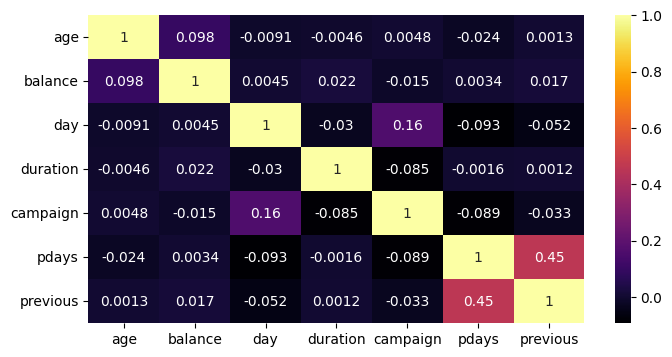

In [33]:
# plot heatmap to check the correlation
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(), cmap="inferno", annot=True)
plt.show()

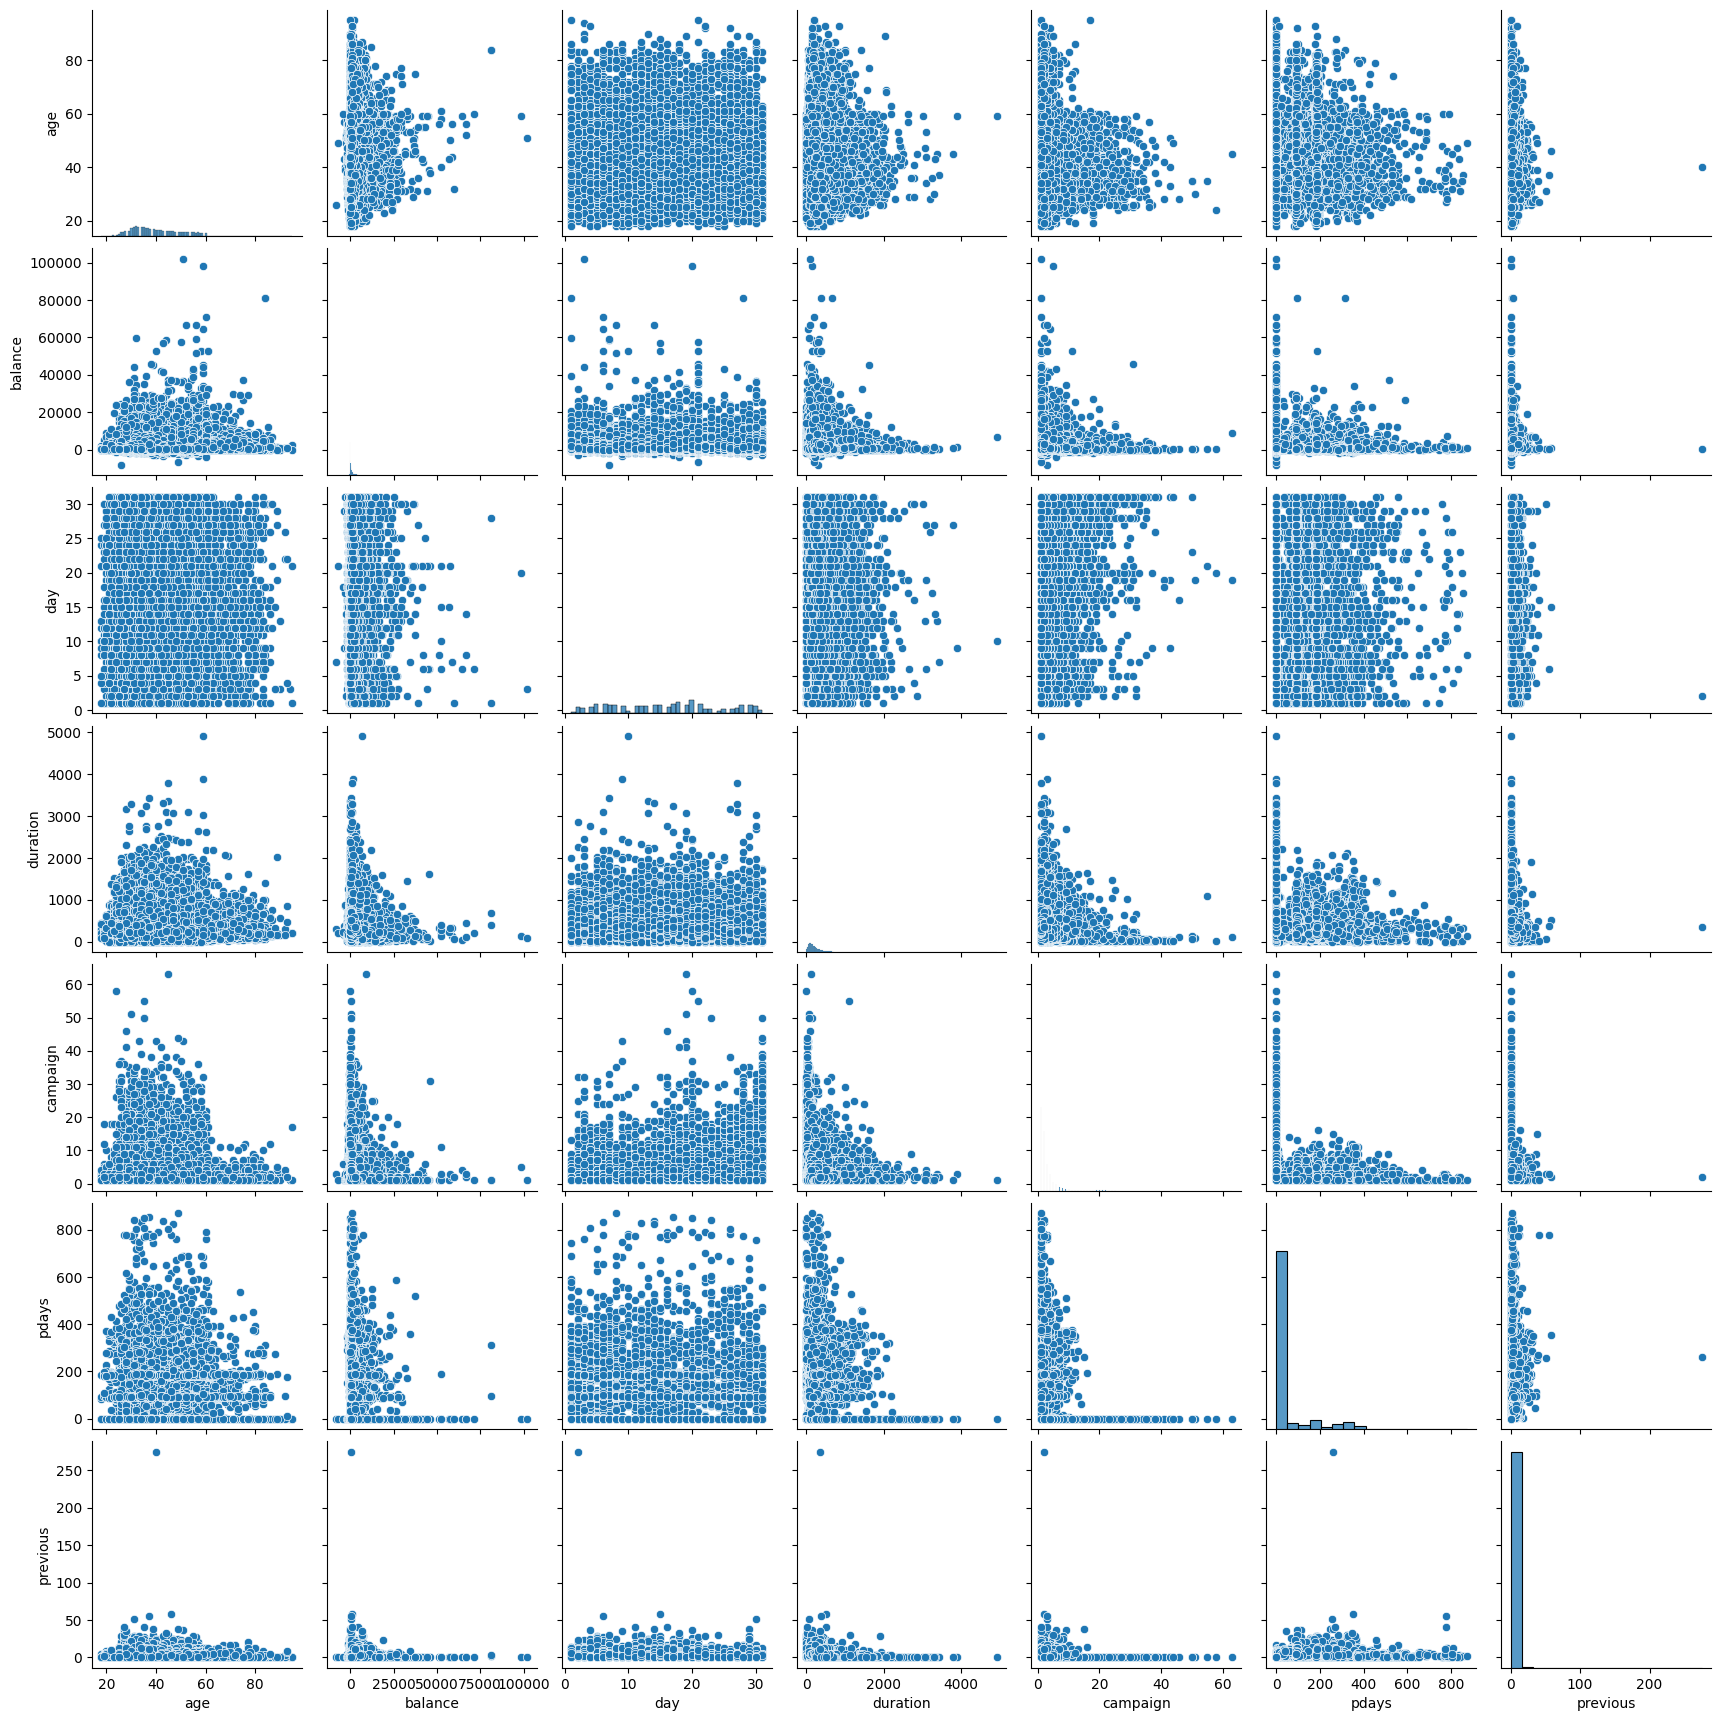

In [34]:
# pairplot of all numeric variables of dataset 'df'
sns.pairplot(df)
plt.show()

# **FEATURE ENCODING**

Encoding refers to the process of converting categorical variables into numerical representations that machine learning algorithms can understand. Categorical variables are variables that represent different categories or labels, such as colors, types of objects, or groups.

In [35]:
#Convert the categorical variables to numerical variables
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['job'] = le.fit_transform(df['job'])
df['marital'] = le.fit_transform(df['marital'])
df['education'] = le.fit_transform(df['education'])
df['default'] = le.fit_transform(df['default'])
df['housing'] = le.fit_transform(df['housing'])
df['loan'] = le.fit_transform(df['loan'])
df['contact'] = le.fit_transform(df['contact'])
df['month'] = le.fit_transform(df['month'])
df['poutcome'] = le.fit_transform(df['poutcome'])
df['Target'] = le.fit_transform(df['Target'])
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [36]:
#Datatypes for all the columns
df.dtypes

age          int64
job          int64
marital      int64
education    int64
default      int64
balance      int64
housing      int64
loan         int64
contact      int64
day          int64
month        int64
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int64
Target       int64
dtype: object

In [37]:
#Summary measures
df.describe().T.style.background_gradient(cmap='viridis')

,count,mean,std,min,25%,50%,75%,max
age,45211.000000,40.936210,10.618762,18.000000,33.000000,39.000000,48.000000,95.000000
job,45211.000000,4.339762,3.272657,0.000000,1.000000,4.000000,7.000000,11.000000
marital,45211.000000,1.167725,0.608230,0.000000,1.000000,1.000000,2.000000,2.000000
education,45211.000000,1.224813,0.747997,0.000000,1.000000,1.000000,2.000000,3.000000
default,45211.000000,0.018027,0.133049,0.000000,0.000000,0.000000,0.000000,1.000000
balance,45211.000000,1362.272058,3044.765829,-8019.000000,72.000000,448.000000,1428.000000,102127.000000
housing,45211.000000,0.555838,0.496878,0.000000,0.000000,1.000000,1.000000,1.000000
loan,45211.000000,0.160226,0.366820,0.000000,0.000000,0.000000,0.000000,1.000000
contact,45211.000000,0.640242,0.897951,0.000000,0.000000,0.000000,2.000000,2.000000
day,45211.000000,15.806419,8.322476,1.000000,8.000000,16.000000,21.000000,31.000000


In [38]:
#Independent variables
x = df.drop(['Target'], axis=1)

In [39]:
#Dependent variable
y = df['Target']

In [40]:
#Count of each values in the variable 'Target'
df.groupby('Target').size()

Target
0    39922
1     5289
dtype: int64

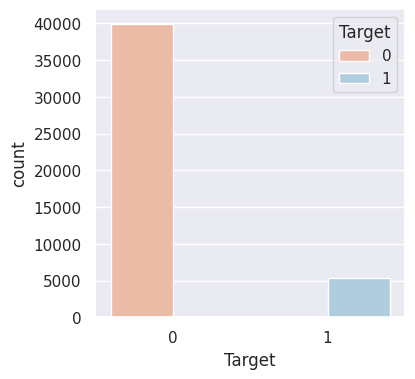

In [41]:
#Pictorial Representation of the target variable in the dataset
sns.set(rc={'figure.figsize':(4,4)})
sns.countplot(x ='Target', hue = "Target", palette='RdBu', data = df)
plt.show()

# **FEATURE SELECTION**

Feature selection methods are intended to reduce the number of input variables to those that are believed to be most useful to a model in order to predict the target variable.

### **ANOVA:**

* ANOVA is an acronym for “analysis of variance” and is a parametric statistical hypothesis test for determining whether the means from two or more samples of data (often three or more) come from the same distribution or not.

* The results of this test can be used for feature selection where those features that are independent of the target variable can be removed from the dataset.

In [42]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
select = SelectKBest(f_classif,k=10)
z = select.fit_transform(x,y)

print("After selecting best 10 features:", z.shape)

After selecting best 10 features: (45211, 10)


In [43]:
#List of selected features
New_features=select.get_feature_names_out()
list(New_features)

['education',
 'balance',
 'housing',
 'loan',
 'contact',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome']

In [44]:
#Ranking the selected features based on its importance
best_cols = select.get_support(indices=True)
best_cols

array([ 3,  5,  6,  7,  8, 11, 12, 13, 14, 15])

age 28.625233091669337
job 74.048351425363
marital 94.1500255039661
education 199.2428250765252
default 22.733923216953407
balance 126.57227551143085
housing 892.9505764572946
loan 211.16739503154506
contact 1017.9659303516922
day 36.35900965378929
month 27.089689376291215
duration 8333.761148332398
campaign 243.35840443473464
pdays 490.696562680924
previous 396.4439894423847
poutcome 275.5968724029108


Text(0, 0.5, 'Features')

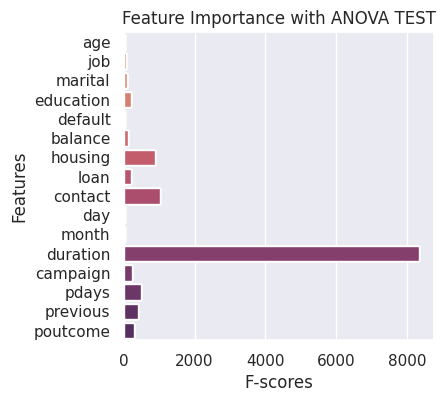

In [45]:
#Scores of features on their importances
scores = select.scores_
pvalues = select.pvalues_
cols = x.columns
for idx in range(x.shape[1]):
  print(cols[idx], scores[idx])

#Plot the scores of the features on their importances
  sns.barplot(y=cols,x=scores,palette="flare")
plt.title("Feature Importance with ANOVA TEST")
plt.xlabel("F-scores")
plt.ylabel("Features")

# **TRAIN VALIDATION AND TEST SETS**

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [47]:
print(f"Shape of Train set : {np.shape(x_train)}")
print(f"Shape of Test set : {np.shape(x_test)}")
print(f"Shape of Train set : {np.shape(y_train)}")
print(f"Shape of Test set : {np.shape(y_test)}")

Shape of Train set : (36168, 16)
Shape of Test set : (9043, 16)
Shape of Train set : (36168,)
Shape of Test set : (9043,)


In [48]:
#Handling imbalanced dataset
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_train, y_train = smote.fit_resample(x_train, y_train)

# **NORMALIZATION**

In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# **MODEL BUILDING**

### **LOGISTIC REGRESSION**

* Logistic regression is used for solving the classification problems.

* It is used for predicting the categorical dependent variable using a given set of independent variables.

* Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. It can be either Yes or No, 0 or 1, true or False, etc..

In [50]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)

#Evaluation of the model
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
print("Accuracy score : ",accuracy_score(y_pred_lr,y_test))
print("precision score : ",precision_score(y_pred_lr,y_test,average='macro'))
print("recall score : ",recall_score(y_pred_lr,y_test,average='macro'))
print("f1 score : ",f1_score(y_pred_lr,y_test,average='macro'))

Accuracy score :  0.808802388587858
precision score :  0.7436678478887717
recall score :  0.6433954407796271
f1 score :  0.6659146226640157


### **RANDOM FOREST CLASSIFIER**

* Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset.

* The greater number of trees in the forest leads to higher accuracy and prevents the problem of overfitting.

In [51]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred_rfc=rfc.predict(x_test)

#Evaluation of the model
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
print("Accuracy score : ",accuracy_score(y_pred_rfc,y_test))
print("precision score : ",precision_score(y_pred_rfc,y_test,average='macro'))
print("recall score : ",recall_score(y_pred_rfc,y_test,average='macro'))
print("f1 score : ",f1_score(y_pred_rfc,y_test,average='macro'))

Accuracy score :  0.8810129381842309
precision score :  0.7764284299648463
recall score :  0.7226655151359189
f1 score :  0.7447691444099949


### **DECISION TREE CLASSIFIER**

* It is a graphical representation for getting all the possible solutions to a problem/decision based on given conditions.

* It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

In [53]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred_dtc=dtc.predict(x_test)

#Evaluation of the model
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
print("Accuracy score : ",accuracy_score(y_pred_dtc,y_test))
print("precision score : ",precision_score(y_pred_dtc,y_test,average='macro'))
print("recall score : ",recall_score(y_pred_dtc,y_test,average='macro'))
print("f1 score : ",f1_score(y_pred_dtc,y_test,average='macro'))

Accuracy score :  0.8507132588742674
precision score :  0.7266436905999712
recall score :  0.671110583233622
f1 score :  0.6918466408190465


### **PLOT FOR EVALUATION METRICS OF VARIOUS MACHINE LEARNING MODELS**

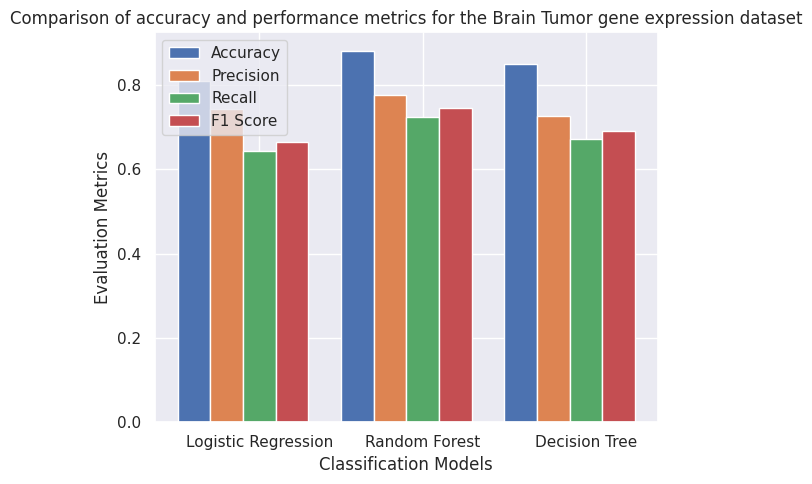

In [56]:
# plot the evaluation metrics for each model
model_names = ['Logistic Regression', 'Random Forest', 'Decision Tree']
accuracy = [0.809, 0.881, 0.851]
precision = [0.744, 0.776, 0.727]
recall = [0.643, 0.723, 0.671]
f1_score = [0.666, 0.745, 0.692]

num_models = len(model_names)
bar_width = 0.2
bar_positions = np.arange(num_models)
fig, ax = plt.subplots()

# Create the bar plots for each evaluation metric
accuracy_bar = ax.bar(bar_positions, accuracy, bar_width, label='Accuracy')
precision_bar = ax.bar(bar_positions + bar_width, precision, bar_width, label='Precision')
recall_bar = ax.bar(bar_positions + 2 * bar_width, recall, bar_width, label='Recall')
f1_score_bar = ax.bar(bar_positions + 3 * bar_width, f1_score, bar_width, label='F1 Score')

# Set the labels and tick positions in the chart
ax.set_xlabel('Classification Models')
ax.set_xticks(bar_positions + 2 * bar_width)
ax.set_xticklabels(model_names)
fig.set_size_inches(6, 5)
ax.set_ylabel('Evaluation Metrics')
ax.set_title('Comparison of accuracy and performance metrics for the Brain Tumor gene expression dataset')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

### **K-FOLD CROSS VALIDATION FOR VARIOUS MACHINE LEARNING MODELS**

In [57]:
from sklearn.model_selection import cross_val_score, KFold
cv=KFold(n_splits=5, random_state=0, shuffle=True)

scores = cross_val_score(lr, x_train, y_train, cv = cv,scoring='accuracy')
print("Logistic Regression Average CV Score: ",scores.mean())

scores = cross_val_score(rfc, x_train, y_train, cv = cv,scoring='accuracy')
print("Random Forest Average CV Score: ",scores.mean())

scores = cross_val_score(dtc, x_train, y_train, cv = cv,scoring='accuracy')
print("Decision Tree Average CV Score: ",scores.mean())

Logistic Regression Average CV Score:  0.8565680867639973
Random Forest Average CV Score:  0.9318765070238874
Decision Tree Average CV Score:  0.8952632592250408


### **PLOT FOR CV SCORES ON VARIOUS MACHINE LEARNING MODELS**

[Text(0, 0, 'Logistic Regression'),
 Text(1, 0, 'Random Forest'),
 Text(2, 0, 'Decision Tree')]

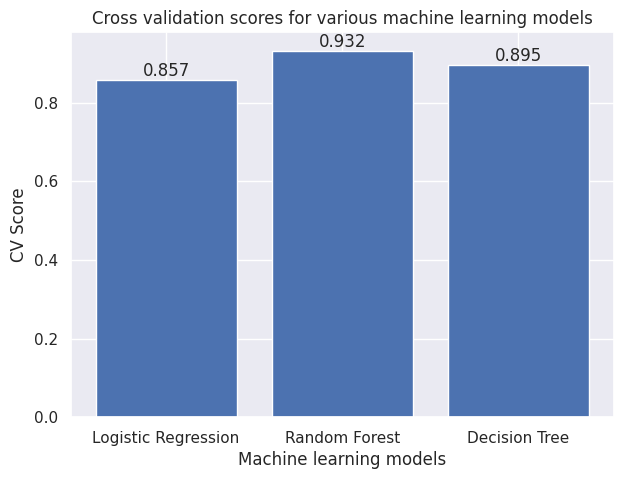

In [59]:
models = ['Logistic Regression', 'Random Forest', 'Decision Tree']
cv_score = [0.857, 0.932, 0.895]

position = range(len(models))
fig, ax = plt.subplots(figsize=(7, 5))
ax.bar(position, cv_score)

for i, v in enumerate(cv_score):
    ax.text(i, v, str(v), ha='center', va='bottom')

ax.set_xlabel('Machine learning models')
ax.set_ylabel('CV Score')
ax.set_title('Cross validation scores for various machine learning models')
ax.set_xticks(position)
ax.set_xticklabels(models)

### **COMPARISON OF ACCURACY AND AVERAGE OF CROSS VALIDATION SCORES ON VARIOUS MACHINE LEARNING MODELS**

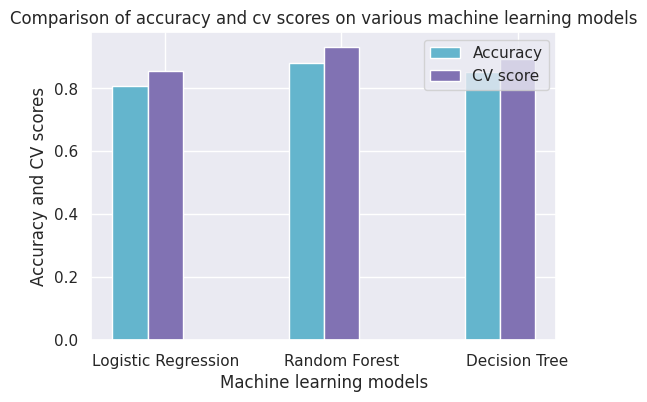

In [60]:
#plot to compare the accuracy and cv scores among various machine learning models
models = ['Logistic Regression', 'Random Forest', 'Decision Tree']
accuracy = [0.809, 0.881, 0.851]
cv_score = [0.857, 0.932, 0.895]

position = range(len(models))
plt.figure(figsize=(6, 4))
bar_width = 0.2
plt.bar(position, accuracy, color='c', width=bar_width, label='Accuracy')
plt.bar([p + bar_width for p in position], cv_score, color='m', width=bar_width, label='CV score')
plt.xlabel('Machine learning models')
plt.ylabel('Accuracy and CV scores')
plt.title('Comparison of accuracy and cv scores on various machine learning models')
plt.xticks([p + bar_width for p in position], models)
plt.legend()
plt.show()

### Random Forest Classifier is the top performer
# **HYPERPARAMETER TUNING**

# **FINAL MODEL**

In [62]:
classifier = RandomForestClassifier(class_weight = None, max_depth = 7, max_features = 'sqrt', min_samples_split = 2, n_estimators = 100)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [63]:
#actual and predicted output
dict={'Actual Output':y_test, 'Predicted Output':y_pred}
df1=pd.DataFrame(dict)
df1.head(25)

,Actual Output,Predicted Output
14001,0,0
32046,1,1
13318,0,0
42991,0,0
14237,0,0
14360,0,0
36635,0,0
37042,0,0
25994,0,0
14555,0,0


### **EVALUATION METRICS**

* The confusion matrix provides insights into the correct and incorrect predictions for each class, allowing for a detailed analysis of accuracy.

* The classification report includes metrics such as F1 score, precision, recall, and accuracy for each class, providing a comprehensive analysis of performance metrics for classification models.

**Accuracy:** Accuracy is an evaluation metric that allows you to measure the total number of predictions a model gets right.

**Precision:** It measures the proportion of correctly predicted positive instances (TP) out of the total instances predicted as positive (TP + FP). It represents the model's ability to minimize false positives.

**Recall (Sensitivity or True Positive Rate):** It measures the proportion of correctly predicted positive instances (TP) out of the total actual positive instances (TP + FN). It represents the model's ability to minimize false negatives.

**F1 Score:** It is the harmonic mean of precision and recall, providing a balanced measure of the model's accuracy. It is particularly useful when dealing with imbalanced datasets.

**Confusion Matrix:**

* The confusion matrix is a table that shows the performance of a classification model by summarizing the counts of true positive (TP), true negative (TN), false positive (FP), and false negative (FN) predictions.

* It provides a detailed breakdown of the model's predictions for each class, allowing us to evaluate its performance on different classes separately.

* The rows of the matrix represent the actual classes, while the columns represent the predicted classes.

* The diagonal elements of the matrix represent the correct predictions, while the off-diagonal elements represent the incorrect predictions.

* By analyzing the confusion matrix, we can assess the model's accuracy, precision, recall, and other metrics for each class.

**Classification Report:**

The classification report provides a comprehensive evaluation of a classification model's performance, including metrics such as precision, recall, F1 score, and support.

**Support:** It represents the number of instances in each class, indicating the distribution of the classes in the dataset.

By examining the confusion matrix and classification report, we can gain insights into a model's overall performance, identify potential areas of improvement, and compare the performance of different models based on various metrics.



Accuracy score :  0.8268273802941501
precision score :  0.8268273802941501
recall score :  0.8268273802941501
f1 score :  0.8268273802941501

classification report 

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      6970
           1       0.74      0.38      0.50      2073

    accuracy                           0.83      9043
   macro avg       0.79      0.67      0.70      9043
weighted avg       0.82      0.83      0.80      9043



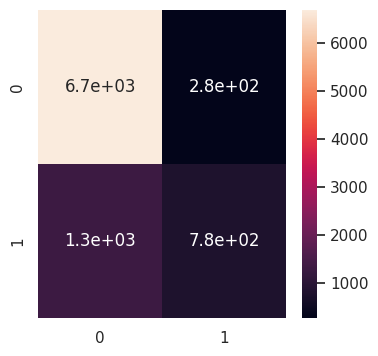

In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, classification_report
print("Accuracy score : ",accuracy_score(y_pred,y_test))
print("precision score : ",precision_score(y_pred,y_test,average='micro'))
print("recall score : ",recall_score(y_pred,y_test,average='micro'))
print("f1 score : ",f1_score(y_pred,y_test,average='micro'))
print("\nclassification report \n")
print(classification_report(y_pred, y_test))
sns.heatmap(confusion_matrix(y_pred,y_test), annot = True)
plt.show()

### **INFERENCE**

* The prediction of bank marketing campaigns dataset performs well with an accuracy of 83% in Random forest model.